In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

from gfos.data.utils import load_layout

In [2]:
data_root = r"H:\data\gfos\predict-ai-model-runtime\npz_all\npz\layout"
data_root = Path(data_root)

In [3]:
xla_default = load_layout(data_root, compile_type="default", model_type="xla")
xla_random = load_layout(data_root, compile_type="random", model_type="xla")


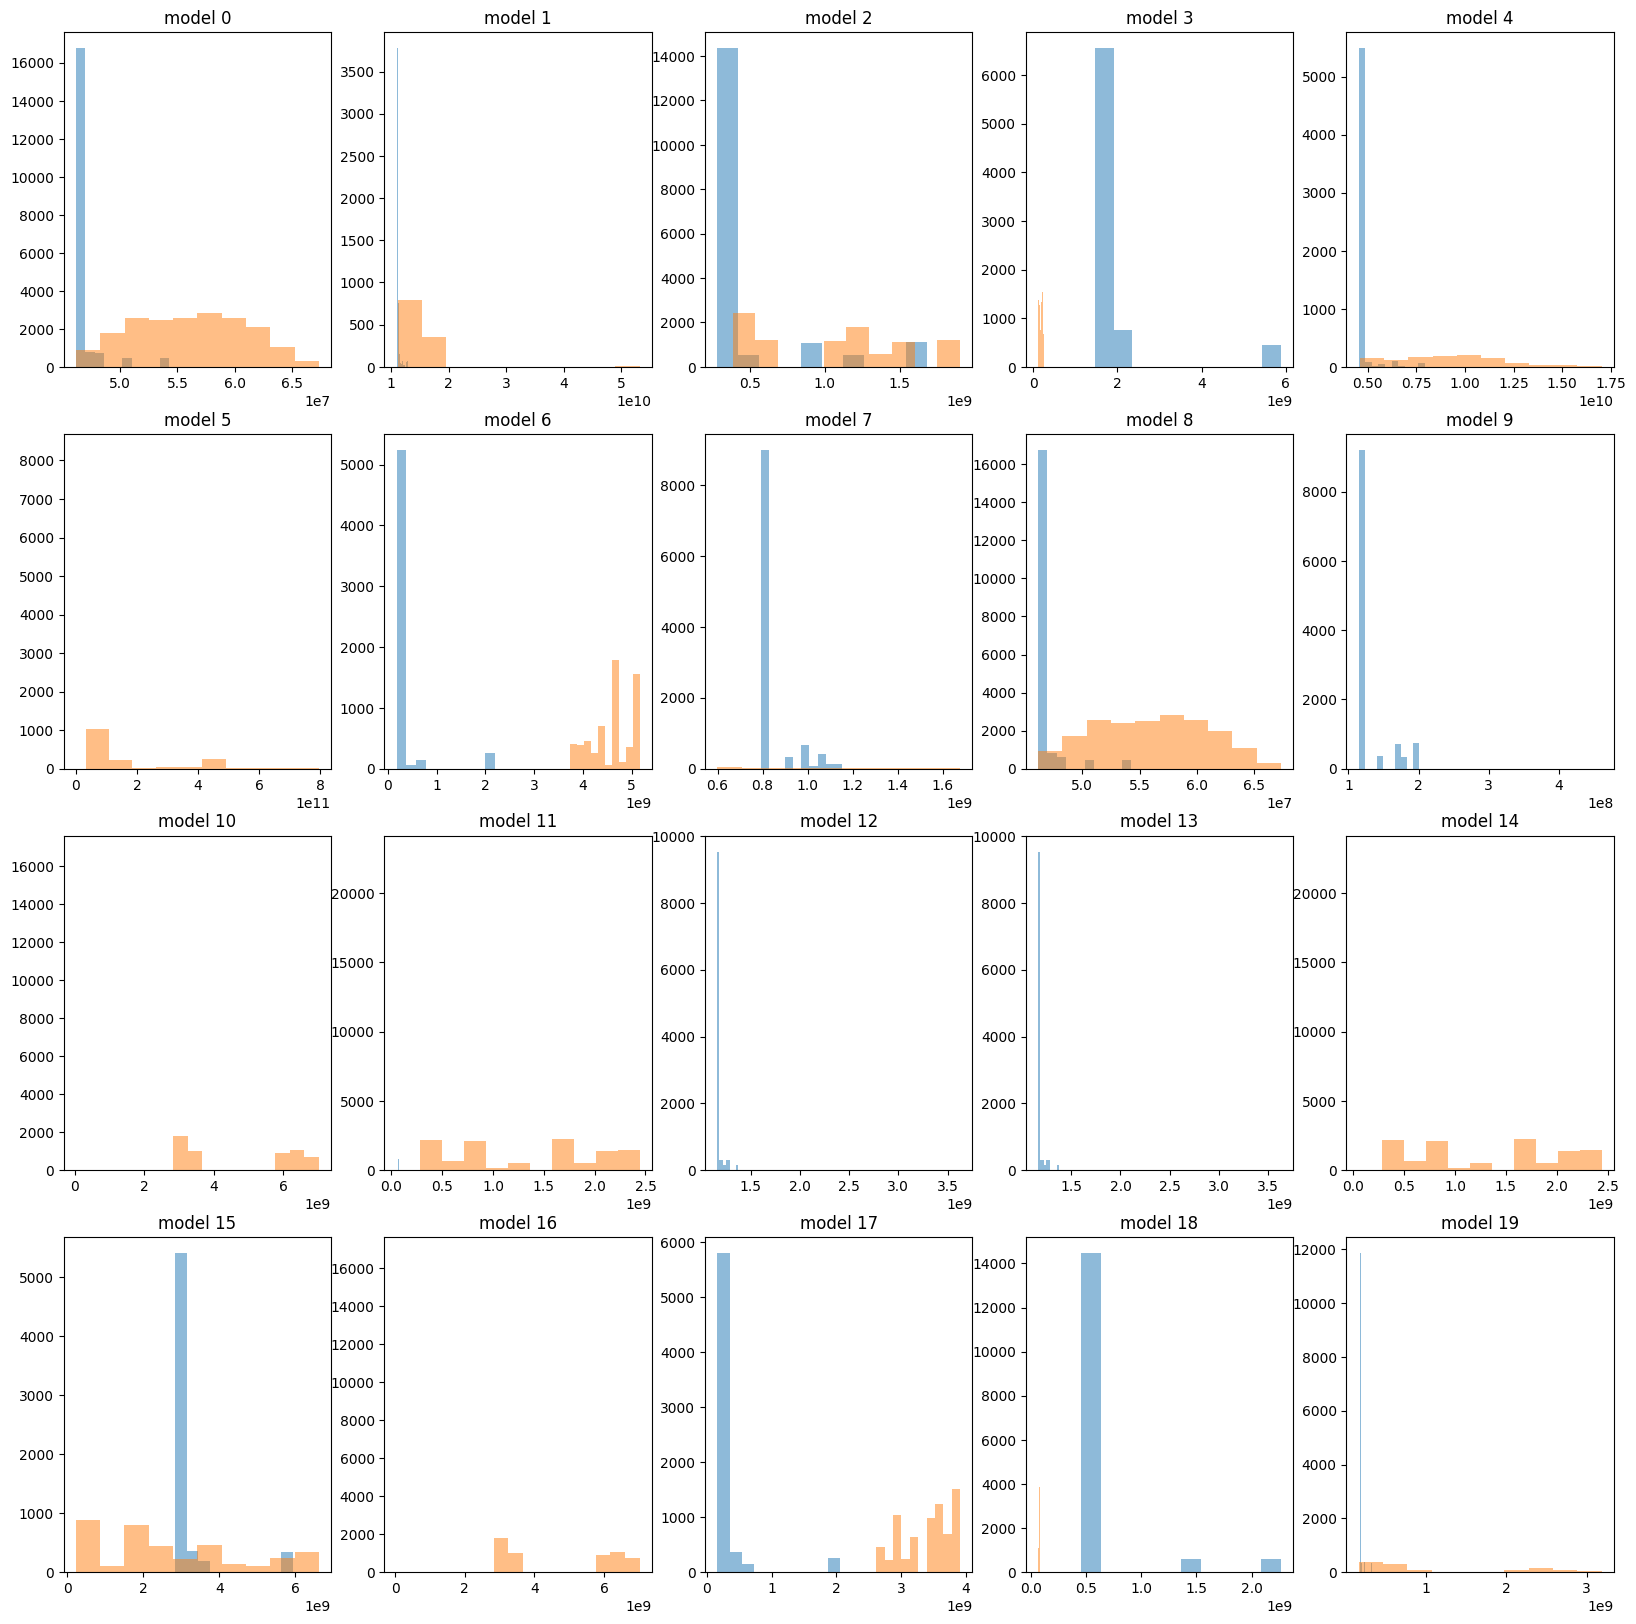

In [4]:
axes = plt.subplots(4, 5, figsize=(20, 20))[1].flatten()

for i, idx in enumerate(np.random.choice(len(xla_default["train"]), 20)):
    model_default = np.load(xla_default["train"][idx])
    model_random = np.load(xla_random["train"][idx])

    axes[i].hist(model_default["config_runtime"], alpha=0.5)
    axes[i].hist(model_random["config_runtime"], alpha=0.5)
    axes[i].set_title(f"model {i}")


In [4]:
from gfos.data.dataset import LayoutDataset, Normalizer

norm_path = "../../data/normalizer.json"
default_dataset = LayoutDataset(xla_default["train"], max_configs=2000, num_configs=64, normalizer=Normalizer.from_json(norm_path , source="xla", search="default"))
# random_dataset = LayoutDataset(xla_random["train"], max_configs=6000, num_configs=128, normalizer=Normalizer.from_json(norm_path , source="xla", search="random"))

Loading data: 100%|██████████| 61/61 [00:44<00:00,  1.36it/s, xception_imagenet]                        


In [5]:
from torch_geometric.loader import DataLoader

NUM_BATCHES = 4

In [6]:
loader = DataLoader(default_dataset, batch_size=NUM_BATCHES, shuffle=True, follow_batch=['node_config_feat', 'node_feat'])

In [53]:
for batch in loader:
    print(batch)
    break

LayoutDataBatch(edge_index=[2, 64175], model_id=[4], node_feat=[44440, 112], node_feat_batch=[44440], node_feat_ptr=[5], node_opcode=[44440], node_config_feat=[16, 3746, 14], node_config_feat_batch=[3746], node_config_feat_ptr=[5], node_config_ids=[3746], config_runtime=[64], config_edge_index=[2, 14128], num_config_nodes=[4], batch=[44440], ptr=[5])


In [7]:
import gfos.model.gnn as gfos_gnn

import importlib
importlib.reload(gfos_gnn)

<module 'gfos.model.gnn' from 'g:\\projects\\gfos\\src\\gfos\\model\\gnn.py'>

In [8]:
model = gfos_gnn.LayoutModel(node_feat_dim=112, node_config_dim=14, dropout=0.2)

In [16]:
for batch in loader:
    out = model(
        batch.node_feat,
        batch.node_opcode,
        batch.edge_index,
        batch.node_config_feat,
        batch.node_config_ids,
        batch.config_edge_index,
        batch.node_config_feat_batch,
        batch_size=len(batch.model_id),
    )
    print(out.shape)

torch.Size([256])
torch.Size([256])
torch.Size([256])
torch.Size([256])
torch.Size([256])
torch.Size([256])
torch.Size([256])
torch.Size([256])
torch.Size([256])
torch.Size([256])
torch.Size([256])
torch.Size([256])
torch.Size([256])
torch.Size([256])
torch.Size([256])
torch.Size([64])


In [17]:
batch.model_id

['xception_imagenet']

In [15]:
batch.model_id

['inception_v2_batch_128_train']

In [55]:
out = model(batch.node_feat, batch.node_opcode, batch.edge_index, batch.node_config_feat, batch.node_config_ids, batch.config_edge_index, batch.node_config_feat_batch, batch_size=NUM_BATCHES)

c 16
tensor([ 0,  0,  0,  ..., 63, 63, 63])


In [56]:
out.shape

torch.Size([64])

In [15]:
print(batch.node_config_ids)

tensor([   48,    52,    88,  ..., 56098, 56260, 56263])


In [9]:
batch_list = [default_dataset[idx] for idx in range(NUM_BATCHES)]
batch = 

In [9]:
n = len(default_dataset)

node_config_feat = []
for i in range(n):
    nc = default_dataset.data[i]["node_config_feat"]
    node_config_feat.append(nc.reshape(-1, nc.shape[-1]))

In [13]:
import torch


node_config_feat = torch.concat(node_config_feat).numpy()

In [14]:
import matplotlib.pyplot as plt

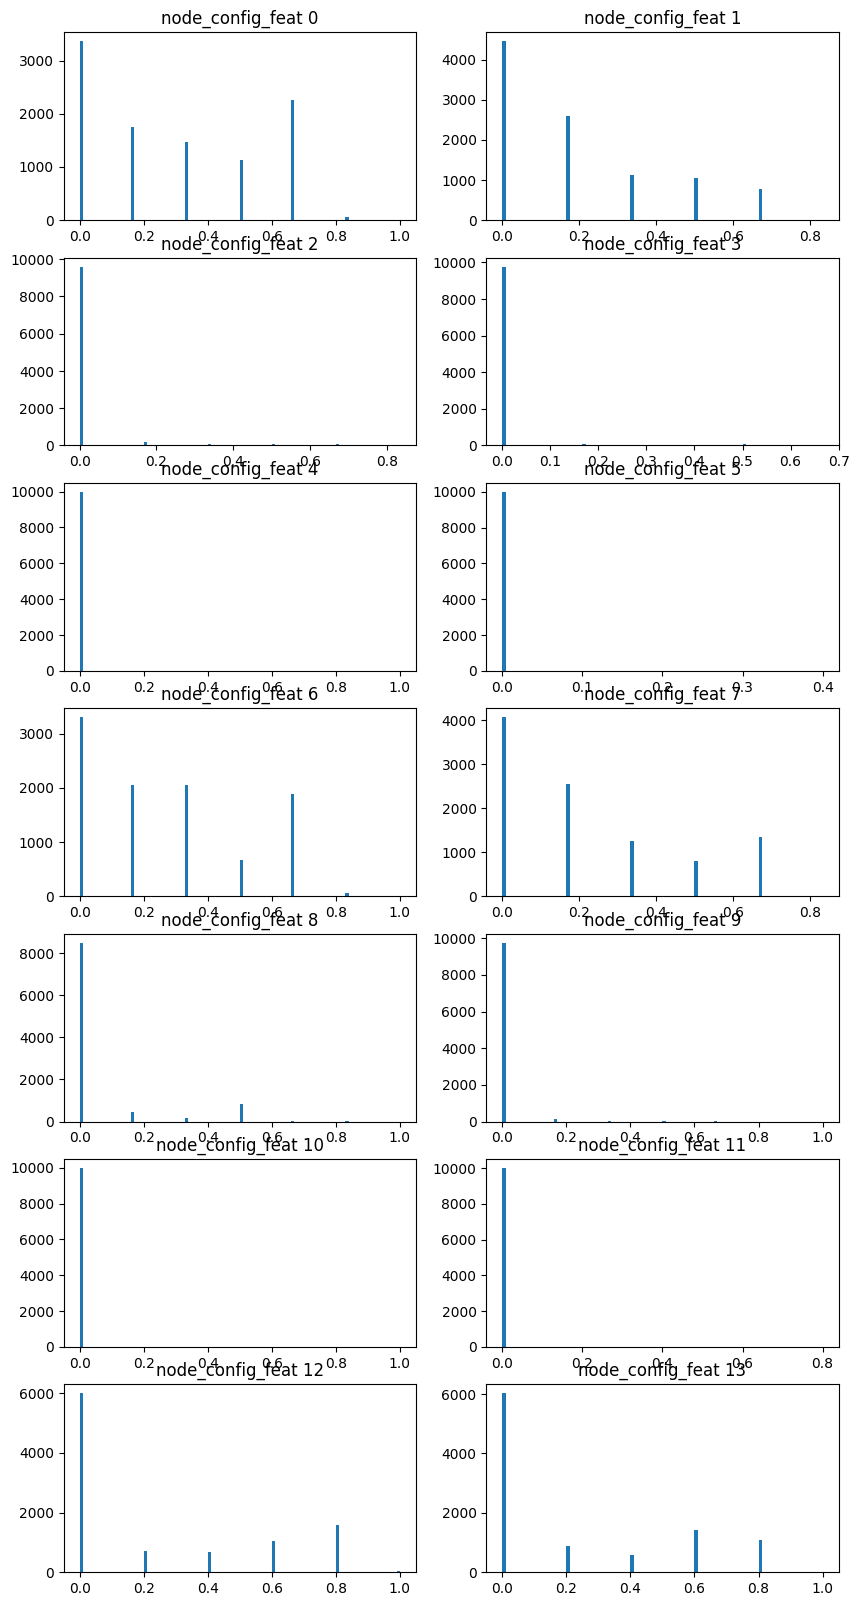

In [15]:
axes = plt.subplots(7, 2, figsize=(10, 20))[1].flatten()

for i in range(14):
    nc = np.random.choice(node_config_feat.shape[0], 10000, replace=False)
    axes[i].hist(node_config_feat[nc, i], bins=100)
    axes[i].set_title(f"node_config_feat {i}")